# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

In [ ]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [ ]:
#Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=2000)

# Transform the text data into a document-term matrix
dtm = vectorizer.fit_transform(people.text)

# Convert the sparse matrix to a dense matrix
dense_dtm = dtm.toarray()

# Print the shape of the dense matrix
print(dense_dtm.shape)



(42786, 2000)


In [ ]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# Initialize KMeans clustering
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Fit KMeans model to the dense matrix
kmeans_model.fit(dense_dtm)

# Retrieve the cluster labels
cluster_labels = kmeans_model.labels_


['10' '100' '11' ... 'youngest' 'youth' 'zealand']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


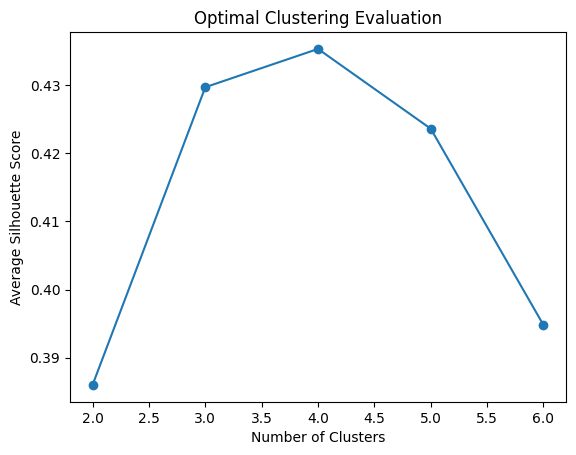

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = []
range_clusters = range(2, 7)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(corpus)
    score = silhouette_score(corpus, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Optimal Clustering Evaluation')
plt.show()